In [244]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [245]:
functions = {
    "liniowa": lambda x: 2 * x + 1,
    "abs": lambda x: np.abs(x),
    "wielomian": lambda x: x**3 - 2 * x**2 + 3 * x - 4,
    "trygonometryczna": lambda x: np.sin(x),
    "złożona": lambda x: np.abs(np.sin(x)*(x**3) + np.cos(x**2) + x**2),
}

In [246]:
start:float = -10
end:float = 10
fKey = "złożona"
# pointsX = np.array([
#     -4, 7
# ])
pointsX = np.linspace(start, end, 12)

In [247]:
if not np.all(np.diff(pointsX) > 0):
    raise ValueError("Tablica punktów nie jest posortowana rosnąco")
if start >= end:
    raise ValueError("Początek przedziału musi być mniejszy od końca")
if fKey not in functions.keys():
    raise ValueError(f"Niepoprawny klucz funkcji: {fKey}")

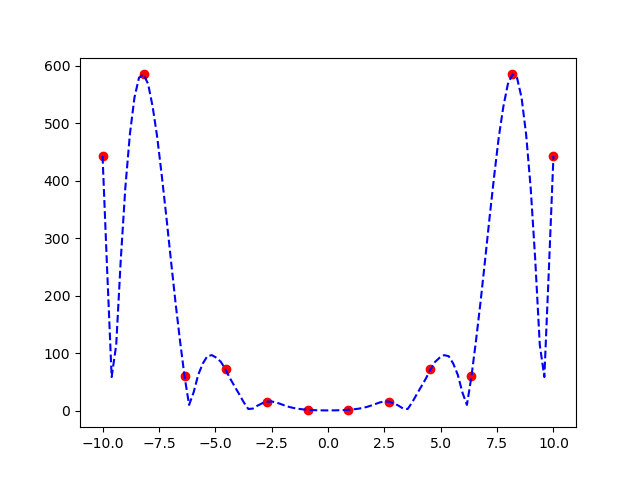

In [248]:
# Wykres oryginalnej funkcji
x = np.linspace(start, end, 100)
y = functions[fKey](x)
plt.figure()
plt.plot(x, y, '--', label="Funkcja oryginalna", color='blue')
plt.scatter(pointsX, functions[fKey](np.array(pointsX)), color='red', label="Węzły")
plt.show()

In [249]:
def newton_interpolation(x_values, y_values):
    n = len(x_values)
    if n != len(y_values):
        raise ValueError("x_values and y_values must have the same length.")
    
    # Tworzymy tablicę różnic dzielonych
    divided_diff = np.zeros((n, n), dtype=float)
    divided_diff[:, 0] = y_values

    for j in range(1, n):
        divided_diff[:n-j, j] = (divided_diff[1:n-j+1, j-1] - divided_diff[:n-j, j-1]) / (x_values[j:] - x_values[:n-j])

    coeffs = divided_diff[0, :]  # współczynniki wielomianu

    # Funkcja interpolująca
    def P(x: float) -> float:
        result = coeffs[0]
        product = 1.0
        for level in range(1, n):
            product *= (x - x_values[level - 1])
            result += coeffs[level] * product
        return result
    return P

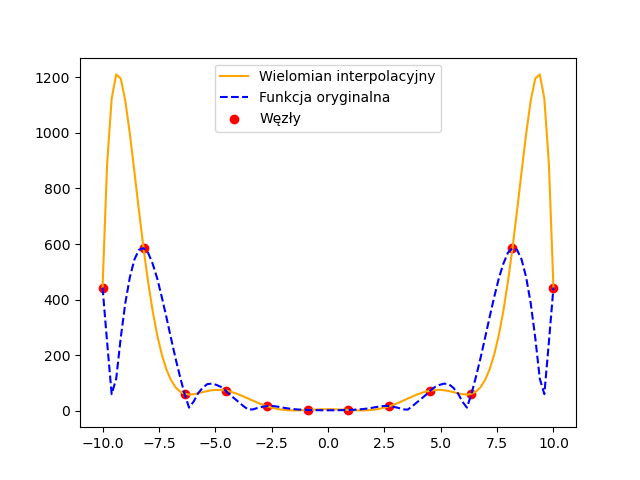

In [250]:
pointsX = np.array(pointsX)
pointsY = functions[fKey](pointsX)
interpolation_func = newton_interpolation(pointsX, pointsY)

y_interpolated = np.vectorize(interpolation_func)(x)
plt.figure()
plt.plot(x, y_interpolated, label="Wielomian interpolacyjny", color='orange')
plt.plot(x, y, '--', label="Funkcja oryginalna", color='blue')
plt.scatter(pointsX, functions[fKey](np.array(pointsX)), color='red', label="Węzły")
plt.legend()
plt.show()

In [251]:
diff = np.abs(y - y_interpolated)

print("ERROR (avg, max):")
print(np.average(diff))
print(np.max(diff))

ERROR (avg, max):
140.7747595006216
1096.2429762112192
